# Toxic Comment Classification Challenge - Abdullah, Irina, Natasha

The project is to build a model capable of detecting the toxicity of a comment, assigning probabilities for different levels of toxicity. Our model is trained on a wikipedia dataset comprised of comments from Wikipedia's discussion pages.

You can find the dataset here : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/overview


## Import libraries

In [64]:
# Import relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt





#import nltk
#import re 
#import string

#from nltk.corpus import stopwords  # Remove useless words
#from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive

# Import packages that help us to create document-term matrix
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Data import from google for google colab:

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#data = pd.read_csv('/content/drive/MyDrive/comments_classification/train.csv')
#data.head()

## Data import for other Notebooks

In [65]:
data = pd.read_csv('data/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


The dataset is composed of each comment id number, the comment itself (texts), and 6 toxic categories.

Here we can see that we have 6 different categories of toxicity : toxic, severely toxic, obscene, threatening, insulting, identity hateread. 

Each comment is evaluated independently for his correspondance to each toxicity categories. If a comment belong to a toxicity category, it will be signified by a 1 on the table, else, it is a 0. Entries with 0 under all the toxicity categories are considered non-toxic comments.

## Cleaning text

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Here we can see that the dataset is already cleaned, with no null entries.

In [9]:
# Installing text cleaning packages
pip install neattext

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 114 kB 6.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


This packages help clean unstructured text data by reducing noises (remove special characters and stopwords), and by reducing repetition of using the same code for text preprocessing.

In [66]:
# importing text cleaning packages
import neattext as nt
import neattext.functions as nfx

### Comment Example

In [21]:
# Reading 3rd comment
ex = data['comment_text'][3]
ex

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [23]:
# Reading with the proper synthax the 3rd comment
clean_ex = nt.TextFrame(ex)
clean_ex

TextFrame(text=""
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "")

In [24]:
# describing the 3rd comment
clean_ex.describe()

Key      Value          
Length  : 622            
vowels  : 196            
consonants: 290            
stopwords: 62             
punctuations: 20             
special_char: 21             
tokens(whitespace): 113            
tokens(words): 116            


Here we can see that the neattext packages help reading the proper synthax of each comment, and allows to see a description of each comments.

In [17]:
# Check percentage of comments that are toxic compared to normal comments
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

90% of the comments are non-toxic.

### Clean data

In [67]:
# clean data by removing ponctuation and stopwords, and putting every word into lowercases
data['clean_comments'] = data['comment_text'].str.lower().apply(lambda x: nfx.clean_text(x, puncts=True, stopwords=True,
                                                             urls=True, emails=True, numbers=True, emojis=True,
                                                             special_char=True, phone_num=True, non_ascii=True, multiple_whitespaces=True,
                                                             contractions=True, currency_symbols=True, custom_pattern=r'@\S+'))
data['clean_comments']

0         explanation edits username hardcore metallica ...
1         daww matches background colour im seemingly st...
2         hey man im trying edit war guy constantly remo...
3         cant real suggestions improvement wondered sec...
4                       sir hero chance remember page thats
                                ...                        
159566    and second time asking view completely contrad...
159567                    ashamed horrible thing talk page 
159568    spitzer umm theres actual article prostitution...
159569      looks like actually speedy version deleted look
159570    dont think understand came idea bad right away...
Name: clean_comments, Length: 159571, dtype: object

#### Separate our dataset into 6 sections. Each section containes the id, the text comment, and the category

In [68]:
data_sev = data.loc[:,['id','clean_comments','severe_toxic']]

In [69]:
data_obs = data.loc[:,['id','clean_comments','obscene']]

In [70]:
data_thr = data.loc[:,['id','clean_comments','threat']]

In [71]:
data_ins = data.loc[:,['id','clean_comments','insult']]

In [72]:
data_ide = data.loc[:,['id','clean_comments','identity_hate']]

In [73]:
data_tox = data.loc[:,['id','clean_comments','toxic']]




## Exploratory Data Analysis

In [12]:
# Here is the total number of rows in the dataset
num_rows = len(data)
num_rows

159571

In [13]:
data_sum = np.count_nonzero(data.iloc[:,2:8], axis=0)
data_sum = pd.DataFrame(data_sum)
data_sum.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_sum = data_sum[0]
print("Number of toxic comment for each category:\n\n", data_sum)

Number of toxic comment for each category:

 toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
Name: 0, dtype: int64


In [14]:
my_list = list(range(len(data_sum)))
data_perc_list = list(map(lambda x: data_sum[x]*100/num_rows , my_list))

# convert into floats element of a list
data_perc_list = [round(float(s)) for s in data_perc_list]

data_perc = pd.DataFrame(data_perc_list)
data_perc.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_perc = data_perc[0]
print("Percentage of toxic comments in specific category related to total number of comments:\n\n", data_perc)

Percentage of toxic comments in specific category related to total number of comments:

 toxic            10
severe_toxic      1
obscene           5
threat            0
insult            5
identity_hate     1
Name: 0, dtype: int64


/home/rikki/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


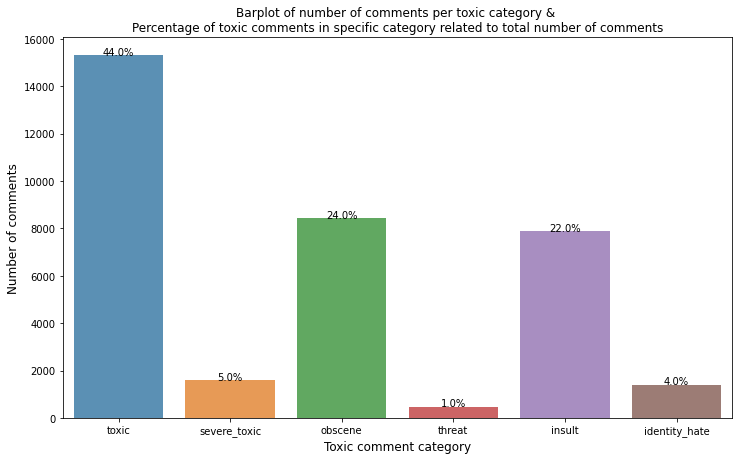

In [26]:
# Plot a chart with the following size
plt.figure(figsize=(12,7))

ax = sns.barplot(data_sum.index, data_sum.values, alpha=0.8)

plt.title("Barplot of number of comments per toxic category & \nPercentage of toxic comments in specific category related to total number of comments")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Toxic comment category', fontsize=12)


patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(data_perc_list[i]), (x, y), ha='center')

plt.show()

Here we can see a barplot of the repartition of toxic comment based on the 6 toxic categories. Approximately 10% of all comments are toxic, 5% are either obscene or insults, 1% are either severly toxic or identity hate, and approximately 0% are threats. We can see that percentages of toxic comments in specific category related to total number of comments are distributed similarly than the number of comments per toxic categories.  

In [17]:
my_list = list(range(len(data_sum)))
data_perc_list = list(map(lambda x: data_sum[x]*100/data_sum.sum() , my_list))

# convert into floats element of a list
data_perc_list = [round(float(s)) for s in data_perc_list]

data_perc = pd.DataFrame(data_perc_list)
data_perc.index = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data_perc = data_perc[0]
print("Percentage of toxic comment in each category related to the total number of toxic comments:\n\n", data_perc)

Percentage of toxic comment in each category related to the total number of toxic comments:

 toxic            44
severe_toxic      5
obscene          24
threat            1
insult           22
identity_hate     4
Name: 0, dtype: int64


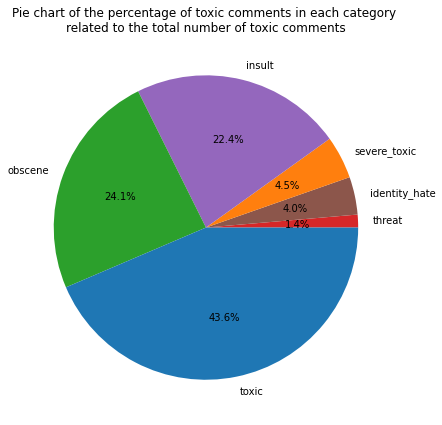

In [18]:
plt.figure(figsize=(12,7))

plt.title("Pie chart of the percentage of toxic comments in each category \nrelated to the total number of toxic comments")

y = data_sum.sort_values()
mycolors = ["tab:red", "tab:brown", "tab:orange", "tab:purple", "tab:green", "tab:blue"]

plt.pie(y, labels = y.index, colors = mycolors, autopct='%1.1f%%')
plt.show() 

Here we can see a pie chart of the percentage of toxic comments in each of the 6 categories related to the total number of toxic comments. Approximately 44% of toxic comments are toxic, around 23% of toxic comments are either obscene or insults, 4% are either severly toxic or identity hate, and approximately 1% are threats. This is interesting because this repartition is similar to the distribution of percentages of toxic comments in specific category related to total number of comments.

We can now wonder what toxic words come back the most in each toxic category!

In [74]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords

In [20]:
def wordcloud(df, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=df[df[label]==1]
    text=subset.clean_comments.values

    wc = WordCloud(collocations=False).generate(' '.join(text))

    plt.figure(figsize=(30,30))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

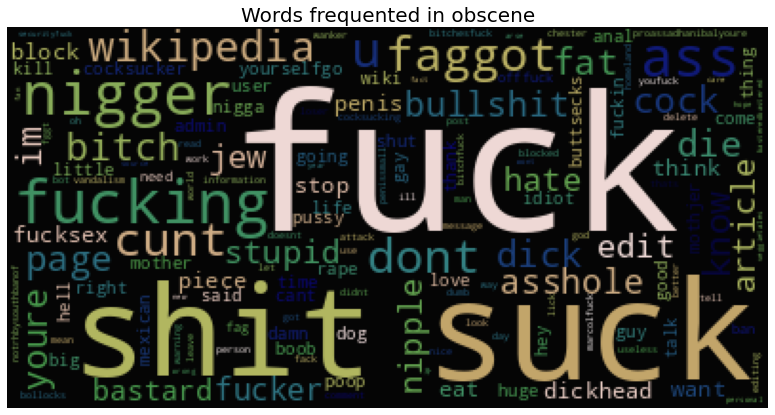

In [21]:
wordcloud(data_obs, 'obscene')

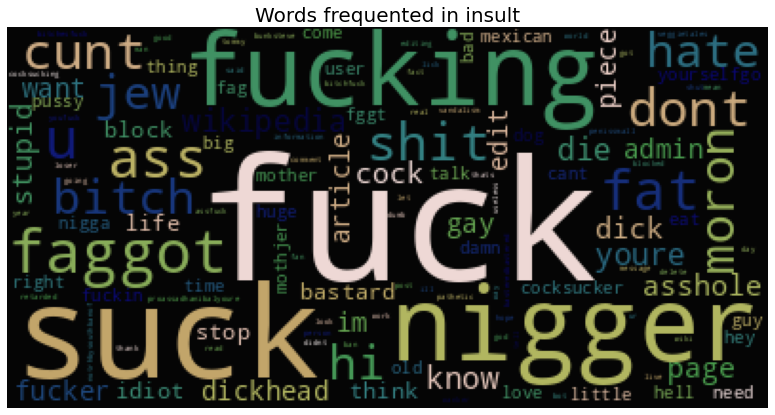

In [22]:
wordcloud(data_ins, 'insult')

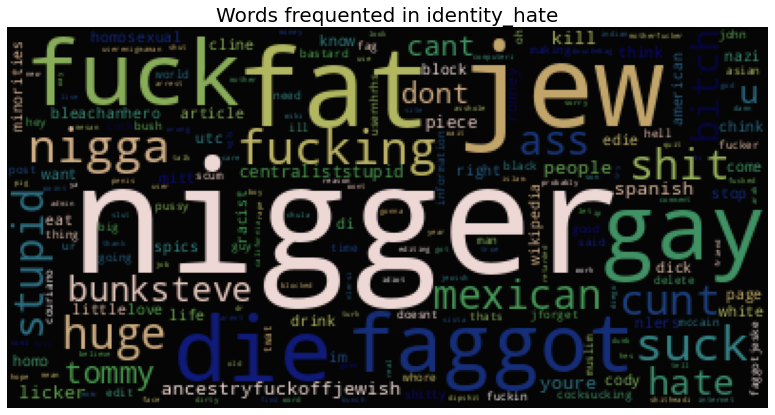

In [23]:
wordcloud(data_ide,'identity_hate')

By comparing the worldcloud of the obscene category, the insult category, and the identity hatetread category, we see similar words turning up, but with different importance/frequencies. For example, the words "nigger", "jew", "fat", and "gay" are the most appareant words of the identity hatetread category but also appears in the obscene category and the insult category. However some recurrant insluts and obscene words we observe in their respective category (such as "fuck" or "dick") do not appear in the identity hatetread category.

On the barplot above we saw that approximately 10% of all comments are toxic, 5% are either obscene or insults, 1% are either severly toxic or identity hate, and approximately 0% are threats. We need the datset to be balanced, so to have an appropriate proportion of toxic and non-toxic comments for each categories.

To do that, we need to take a subset of each data category where the proportion of the toxic comments are at least 20% of the non-toxic comments, better if its 50%.

#### Data toxicicity column

In [75]:
tox_len = data_tox[data_tox.toxic == 1].toxic.value_counts()
tox_len[1]

15294

In [76]:
data_tox_1 = data_tox[data_tox.toxic == 1].head(tox_len[1])
data_tox_1.shape

(15294, 3)

In [77]:
data_tox_0 = data_tox[data_tox.toxic == 0].head(tox_len[1])
data_tox_0.shape

(15294, 3)

In [78]:
# concatenate the toxic and non-toxic comments
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)
data_tox_done.shape

(30588, 3)

#### Data severe toxicicity column

In [79]:
sev_len = data_sev[data_sev.severe_toxic == 1].severe_toxic.value_counts()
sev_len[1]

1595

In [80]:
data_sev_1 = data_sev[data_sev.severe_toxic == 1].head(sev_len[1])
data_sev_0 = data_sev[data_sev.severe_toxic == 0].head(sev_len[1])
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)
data_sev_done.shape

(3190, 3)

#### Data obscene column

In [82]:
obs_len = data_obs[data_obs.obscene == 1].obscene.value_counts()
obs_len[1]

8449

In [83]:
data_obs_1 = data_obs[data_obs.obscene == 1].head(obs_len[1])
data_obs_0 = data_obs[data_obs.obscene == 0].head(obs_len[1])
data_obs_done = pd.concat([data_obs_1, data_obs_0], axis=0)
data_obs_done.shape

(16898, 3)

#### Data threat column

In [86]:
thr_len = data_thr[data_thr.threat == 1].threat.value_counts()
thr_len[1]

478

478*2 threats is not enough for a training dataset, so we are going to do 20% toxic comments and 80% non-toxic comments.

If 478 is 20%, than 1912 is 80%.

In [87]:
data_thr_1 = data_thr[data_thr.threat == 1].head(thr_len[1])
data_thr_0 = data_thr[data_thr.threat == 0].head(1912)
data_thr_done = pd.concat([data_thr_1, data_thr_0], axis=0)
data_thr_done.shape

(2390, 3)

#### Data insult column

In [90]:
ins_len = data_ins[data_ins.insult == 1].insult.value_counts()
ins_len[1]

7877

In [92]:
data_ins_1 = data_ins[data_ins.insult == 1].head(ins_len[1])
data_ins_0 = data_ins[data_ins.insult == 0].head(ins_len[1])
data_ins_done = pd.concat([data_ins_1, data_ins_0], axis=0)
data_ins_done.shape

(15754, 3)

#### Data identity threats column

In [93]:
ide_len = data_ide[data_ide.identity_hate == 1].identity_hate.value_counts()
ide_len[1]

1405

In [94]:
data_ide_1 = data_ide[data_ide.identity_hate == 1].head(ide_len[1])
data_ide_0 = data_ide[data_ide.identity_hate == 0].head(ide_len[1])
data_ide_done = pd.concat([data_ide_1, data_ide_0], axis=0)
data_ide_done.shape

(2810, 3)

- linear regression
- KNN
- Niaves bayes classifier
- SVM
- Random forest vs decision tree

In [ ]:
# Import packages for pre-processing
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel

# Import tools to split data and evaluate model performance
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Import ML algos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
'''
df_done: data_tox_done, data_sev_done, ...
label: toxic, severe_toxic, ...
vectorizer values: CountVectorizer, TfidfVectorizer
gram_range values: (1,1) for unigram, (2,2) for bigram
'''
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Create a Vectorizer object and remove stopwords from the table
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
        
    ''' Initialize all model objects and fit the models on the training data '''
    lr = LogisticRegression()
    lr.fit(X_train_cv1, y_train)
    print('lr done')

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_cv1, y_train)

    bnb = BernoulliNB()
    bnb.fit(X_train_cv1, y_train)
    print('bnb done')
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('mnb done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)

    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('rdf done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(lr.predict(X_test_cv1), y_test), f1_score(knn.predict(X_test_cv1), y_test), 
                                f1_score(bnb.predict(X_test_cv1), y_test), f1_score(mnb.predict(X_test_cv1), y_test),
                                f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['Log Regression','KNN', 'BernoulliNB', 'MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1